In [1]:
import numpy as np
import pandas as pd
from datetime import date
from datetime import time
from datetime import datetime
from datetime import timedelta
import math 

file_database = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-08/ipf_lifts.csv'
# read database from csv file 
db_powerlifting = pd.read_csv(file_database)
db_powerlifting.head()

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name
0,Hiroyuki Isagawa,M,SBD,Single-ply,NaN,NaN,NaN,67.5,67.5,205.0,140.0,225.0,1,1985-08-03,IPF,World Games
1,David Mannering,M,SBD,Single-ply,24.0,24-34,NaN,67.5,67.5,225.0,132.5,235.0,2,1985-08-03,IPF,World Games
2,Eddy Pengelly,M,SBD,Single-ply,35.5,35-39,NaN,67.5,67.5,245.0,157.5,270.0,3,1985-08-03,IPF,World Games
3,Nanda Talambanua,M,SBD,Single-ply,19.5,20-23,NaN,67.5,67.5,195.0,110.0,240.0,4,1985-08-03,IPF,World Games
4,Göran Henrysson,M,SBD,Single-ply,NaN,NaN,NaN,67.5,67.5,240.0,140.0,215.0,5,1985-08-03,IPF,World Games


In [2]:
db_powerlifting.describe()

,age,bodyweight_kg,best3squat_kg,best3bench_kg,best3deadlift_kg
count,38246.000000,40965.000000,27454.000000,38690.000000,27124.000000
mean,34.772708,81.148902,217.552650,144.677881,221.835002
std,14.618234,24.930896,74.614728,60.032659,63.717025
min,0.500000,37.290000,-210.000000,-160.000000,-215.000000
25%,22.500000,60.000000,160.000000,97.500000,170.000000
50%,31.500000,75.550000,215.000000,140.000000,222.500000
75%,45.000000,97.300000,270.000000,185.000000,270.000000
max,93.500000,240.000000,490.000000,415.000000,420.000000


In [3]:
# received information about types and NaN
db_powerlifting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41152 entries, 0 to 41151
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              41152 non-null  object 
 1   sex               41152 non-null  object 
 2   event             41152 non-null  object 
 3   equipment         41152 non-null  object 
 4   age               38246 non-null  float64
 5   age_class         38268 non-null  object 
 6   division          40525 non-null  object 
 7   bodyweight_kg     40965 non-null  float64
 8   weight_class_kg   41151 non-null  object 
 9   best3squat_kg     27454 non-null  float64
 10  best3bench_kg     38690 non-null  float64
 11  best3deadlift_kg  27124 non-null  float64
 12  place             41152 non-null  object 
 13  date              41152 non-null  object 
 14  federation        41152 non-null  object 
 15  meet_name         41152 non-null  object 
dtypes: float64(5), object(11)
memory usage: 

In [4]:
db_powerlifting.division.unique()

array([nan, 'Open', 'Juniors', 'Light', 'Middle', 'Heavy', 'Super',
       'Sub-Juniors', 'Masters 1', 'Masters 2', 'Masters 3', 'Masters 4',
       'SuperHeavy'], dtype=object)

In [5]:
for col in db_powerlifting.columns:
    print(f'{col} : {db_powerlifting[col].isna().sum() / db_powerlifting.shape[0] * 100: .2f}%')

name :  0.00%
sex :  0.00%
event :  0.00%
equipment :  0.00%
age :  7.06%
age_class :  7.01%
division :  1.52%
bodyweight_kg :  0.45%
weight_class_kg :  0.00%
best3squat_kg :  33.29%
best3bench_kg :  5.98%
best3deadlift_kg :  34.09%
place :  0.00%
date :  0.00%
federation :  0.00%
meet_name :  0.00%


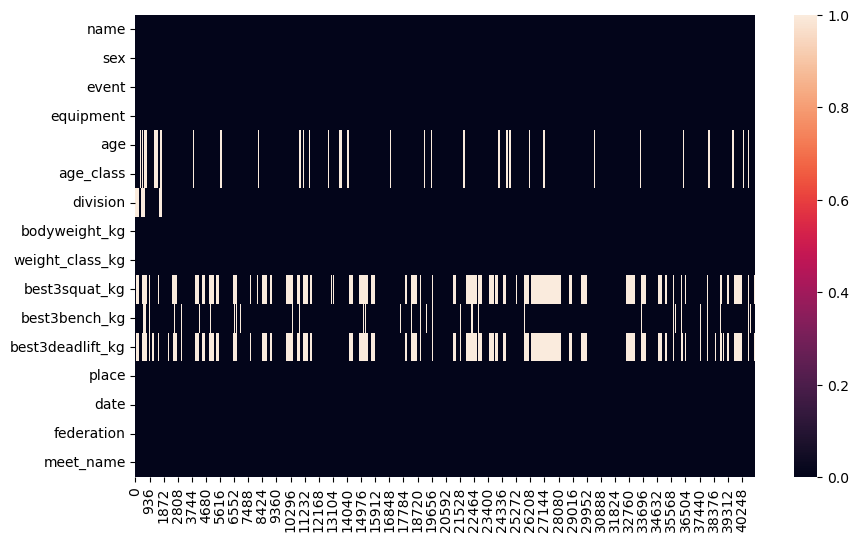

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(db_powerlifting.isna().transpose());

In [7]:
# converted the data in the date column to the datetime type
db_powerlifting.date = pd.to_datetime(db_powerlifting.date, format='%Y-%m-%d')


In [8]:
# deleted complete duplicates, if any
db_powerlifting[db_powerlifting.duplicated()]

# db_powerlifting.drop_duplicates(inplace=True)

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name


In [83]:
#  checked for duplicates all but the result of the competition
dd = db_powerlifting.duplicated(subset=['name', 'sex', 'age',
                                        'equipment', 'bodyweight_kg',
                                        'place', 'date'], 
                                        keep=False)
db_powerlifting[dd].sort_values('name')

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name


In [9]:
# deleted all those who have in the column division NaN, because there is no pattern as it is set
db_powerlifting.dropna(subset ='division', inplace=True)

In [10]:
# checked for other NaN
db_powerlifting.isna().sum()

name                    0
sex                     0
event                   0
equipment               0
age                  2755
age_class            2733
division                0
bodyweight_kg         173
weight_class_kg         1
best3squat_kg       13391
best3bench_kg        2435
best3deadlift_kg    13709
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

In [12]:
def born_year(age_persona):
    """ 
	Calculates age in days based on the number of years
	
	Args:
     age_persona: age in years in float
	"""
    try:
        return (str(math.floor(age_persona*365))+' days')
    except ValueError:
        pass


In [13]:
# # removed NaN in the column age
# 1. they calculated the year of birth for each person based on the data we have
# 2. removed those with NaN instead of year of birth
# 3. calculated age for those with NaN in the age column and entered data instead of NaN

db_powerlifting.loc[:,'age_in_days'] = db_powerlifting.age.apply(born_year).\
                                                            astype('timedelta64[ns]')

db_powerlifting.loc[:,'birth_year_app'] = (db_powerlifting.loc[:,'date']- \
                                            db_powerlifting.loc[:,'age_in_days']).dt.year
d = db_powerlifting.groupby(['name']).\
                    agg(born_year_end = ('birth_year_app', 'mean')).round()

db_powerlifting = db_powerlifting.merge(d, 
                                        how ='inner' , 
                                        left_on='name', 
                                        right_index=True
                                        )
db_powerlifting.dropna(subset = 'born_year_end',
                       inplace=True
                       )
db_powerlifting.loc[:, 'new_age'] = db_powerlifting.loc[:, 'date'].dt.year -\
                                            db_powerlifting.loc[:, 'born_year_end']
db_powerlifting.loc[:,'age'] = db_powerlifting.loc[:,'age'].\
                                            fillna(db_powerlifting['new_age'])
db_powerlifting.drop(['born_year_end',
                      'new_age',
                      'birth_year_app',
                      'age_in_days'], 
                      axis=1, 
                      inplace = True)

db_powerlifting.isna().sum()

name                    0
sex                     0
event                   0
equipment               0
age                     0
age_class             478
division                0
bodyweight_kg         110
weight_class_kg         1
best3squat_kg       13058
best3bench_kg        2271
best3deadlift_kg    13320
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

In [14]:
db_powerlifting.isna().sum()

name                    0
sex                     0
event                   0
equipment               0
age                     0
age_class             478
division                0
bodyweight_kg         110
weight_class_kg         1
best3squat_kg       13058
best3bench_kg        2271
best3deadlift_kg    13320
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

In [15]:
# check variant of age_class 
db_powerlifting.age_class.unique()

array(['24-34', '35-39', '40-44', '60-64', '55-59', '45-49', '50-54',
       '20-23', nan, '18-19', '70-74', '16-17', '65-69', '13-15', '5-12',
       '75-79', '80-999'], dtype=object)

In [16]:
def class_age(age):
    """ 
	return age_class for each person
	
	Args:
     age: age in years in float of person
	"""
    if 5<= age <=12: 
        return '5-12'
    elif 13<= age <=15:
        return '13-15'
    elif 16<= age <=17:
        return '16-17'
    elif 18<= age <=19:
        return '18-19'
    elif 20<= age <=23:
        return '20-23'
    elif 24<= age <=34:
        return '24-34'
    elif 35<= age <=39:
        return '35-39'
    elif 40<= age <=44:
        return '40-44'
    elif 45<= age <=49:
        return '45-49'
    elif 50<= age <=54:
        return '50-54'
    elif 55<= age <=59:
        return '55-59'
    elif 60<= age <=64:
        return '60-64'
    elif 65<= age <=69:
        return '65-69'
    elif 70<= age <=74:
        return '70-74'
    elif 75<= age <=79:
        return '75-79'
    elif 80<= age <=999:
        return '80-999'
    

In [17]:
# Found an age_class for each column with NaN and change it

db_powerlifting.loc[:,'age_class_new'] = db_powerlifting.age.apply(class_age)
db_powerlifting.loc[:,'age_class'] = db_powerlifting.loc[:,'age_class'].\
                                        fillna(db_powerlifting['age_class_new'])
db_powerlifting.drop('age_class_new', 
                     axis=1, 
                     inplace = True
                     )
db_powerlifting.isna().sum()

name                    0
sex                     0
event                   0
equipment               0
age                     0
age_class               1
division                0
bodyweight_kg         110
weight_class_kg         1
best3squat_kg       13058
best3bench_kg        2271
best3deadlift_kg    13320
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

In [18]:
# as there 1 record for which is NaN age_class, looked at the parameters of this person
db_powerlifting[db_powerlifting.age_class.isna()]

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name
34629,Christer Johansson,M,SBD,Single-ply,0.5,None,Open,82.5,82.5,270.0,155.0,302.5,5,1987-11-12,IPF,Men's World Powerlifting Championships


In [19]:
#  leave only those who are more than 5 years old (the minimum age for the competition)
db_powerlifting = db_powerlifting[(db_powerlifting['age'] > 5)]
db_powerlifting.isna().sum()

name                    0
sex                     0
event                   0
equipment               0
age                     0
age_class               0
division                0
bodyweight_kg         110
weight_class_kg         1
best3squat_kg       13058
best3bench_kg        2271
best3deadlift_kg    13320
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

In [20]:
#  looked at what options are available for this weight_class_kg
db_powerlifting.weight_class_kg.unique()

array(['44', '52', '48', '47', '56', '60', '67.5', '57', '75', '67.5+',
       '82.5', '90', '90+', '59', '83', '100', '105', '110', '125', '120',
       '125+', '110+', '120+', '72', '63', '66', '74', '93', '82.5+',
       '84', '84+', '100+', '75+', '105+', '72+', '53', '43', nan, '40'],
      dtype=object)

In [21]:
# check information en this line where NaN is in weight_class_kg
db_powerlifting[db_powerlifting.weight_class_kg.isna()]

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name
21589,Adam Csupori,M,SBD,Single-ply,40.0,40-44,Masters 1,90.0,NaN,NaN,NaN,NaN,DQ,1997-10-14,IPF,World Masters Powerlifting Championships


In [22]:
# removed NaN in weight_class_kg, according to the data of weight and categories that are

db_powerlifting['weight_class_kg'] = db_powerlifting['weight_class_kg'].\
                                                    fillna('90')
db_powerlifting.isna().sum()

name                    0
sex                     0
event                   0
equipment               0
age                     0
age_class               0
division                0
bodyweight_kg         110
weight_class_kg         0
best3squat_kg       13058
best3bench_kg        2271
best3deadlift_kg    13320
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

In [23]:
def del_nan(frame, name_of_column, list_for_group, func):
    """ 
	calculates the average value of a column of columns grouped by a list of fields
    and fills the fields with NaN in these columns with the previously calculated value
	
	Args:
     frame:          frathe frame in which we will workme 
     name_of_column: the name of the column to be used for calculations
     list_for_group: list of columns to be grouped by
	"""

    mean_group = frame.groupby(list_for_group)[name_of_column].transform(func)
    frame[name_of_column] = frame[name_of_column].fillna(mean_group)
    # frame.drop('mean_columns_group', axis=1, inplace = True)

    return frame

In [24]:
# replaced NaN for bodyweight_kg, by the average value for this category

db_powerlifting = del_nan(db_powerlifting, 
                          'bodyweight_kg', 
                          ['weight_class_kg'],
                           'median')
db_powerlifting.isna().sum()

name                    0
sex                     0
event                   0
equipment               0
age                     0
age_class               0
division                0
bodyweight_kg           0
weight_class_kg         0
best3squat_kg       13058
best3bench_kg        2271
best3deadlift_kg    13320
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

In [25]:
# replaced NaN for best3squat_kg, by the average of 'division', 'sex'

db_powerlifting = del_nan(db_powerlifting, 
                          'best3squat_kg',
                           ['division', 'sex'],
                           'median')
db_powerlifting.isna().sum()



name                    0
sex                     0
event                   0
equipment               0
age                     0
age_class               0
division                0
bodyweight_kg           0
weight_class_kg         0
best3squat_kg           0
best3bench_kg        2271
best3deadlift_kg    13320
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

In [26]:
# replaced NaN for best3bench_kg, by the average of 'division', 'sex'

db_powerlifting = del_nan(db_powerlifting,
                          'best3bench_kg', 
                          ['division', 'sex'],
                           'median')
db_powerlifting.isna().sum()


name                    0
sex                     0
event                   0
equipment               0
age                     0
age_class               0
division                0
bodyweight_kg           0
weight_class_kg         0
best3squat_kg           0
best3bench_kg           0
best3deadlift_kg    13320
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

In [27]:
# replaced NaN for best3deadlift_kg, by the average of 'division', 'sex'

db_powerlifting = del_nan(db_powerlifting, 
                         'best3deadlift_kg', 
                         ['division', 'sex'],
                         'median')
db_powerlifting.isna().sum()


name                0
sex                 0
event               0
equipment           0
age                 0
age_class           0
division            0
bodyweight_kg       0
weight_class_kg     0
best3squat_kg       0
best3bench_kg       0
best3deadlift_kg    0
place               0
date                0
federation          0
meet_name           0
dtype: int64

In [28]:
# check at the statistics

db_powerlifting.describe()

,age,bodyweight_kg,best3squat_kg,best3bench_kg,best3deadlift_kg
count,38246.000000,38246.000000,38246.000000,38246.000000,38246.000000
mean,34.835198,81.412474,216.386440,146.108117,222.489857
std,14.648884,25.212009,69.578765,59.702004,60.175158
min,9.000000,37.290000,-210.000000,-160.000000,-215.000000
25%,22.500000,60.500000,160.000000,97.500000,170.000000
50%,31.500000,76.400000,220.000000,142.500000,230.000000
75%,45.500000,97.735000,272.500000,187.500000,275.000000
max,93.500000,240.000000,490.000000,415.000000,420.000000


In [29]:
# have dismissed the noise

db_powerlifting = db_powerlifting[
    (db_powerlifting['best3squat_kg'] > 0) &
    (db_powerlifting['best3bench_kg'] > 0) & 
    (db_powerlifting['best3deadlift_kg'] > 0)]

db_powerlifting.isna().sum()

name                0
sex                 0
event               0
equipment           0
age                 0
age_class           0
division            0
bodyweight_kg       0
weight_class_kg     0
best3squat_kg       0
best3bench_kg       0
best3deadlift_kg    0
place               0
date                0
federation          0
meet_name           0
dtype: int64

In [30]:
db_powerlifting.describe()

,age,bodyweight_kg,best3squat_kg,best3bench_kg,best3deadlift_kg
count,38235.000000,38235.000000,38235.000000,38235.000000,38235.000000
mean,34.834693,81.414143,216.439213,146.134982,222.523004
std,14.647839,25.214224,69.448653,59.650639,60.076662
min,9.000000,37.290000,40.000000,25.000000,25.000000
25%,22.500000,60.500000,160.000000,97.500000,170.000000
50%,31.500000,76.400000,220.000000,142.500000,230.000000
75%,45.500000,97.750000,272.500000,187.500000,275.000000
max,93.500000,240.000000,490.000000,415.000000,420.000000


In [31]:
# 2. Найдите рекорды каждого пола и каждого подразделения в каждом из 3
# упражнений (жим лежа, приседания и становая тяга).

db_powerlifting.groupby(['sex', 'division']).\
            agg(max_best3squat_kg=('best3squat_kg', max),
                max_best3bench_kg=('best3bench_kg', max), 
                max_best3deadlift_kg=('best3deadlift_kg', max))

max_best3squat_kg  max_best3bench_kg  max_best3deadlift_kg
sex division                                                               
F   Heavy                    305.0              192.5                 248.5
    Juniors                  282.5              190.5                 252.5
    Light                    220.0              150.0                 202.5
    Masters 1                245.0              197.5                 248.0
    Masters 2                255.0              172.5                 227.5
    Masters 3                210.0              140.0                 190.0
    Masters 4                135.0              115.0                 142.5
    Middle                   247.5              170.0                 235.0
    Open                     322.5              235.0                 270.5
    Sub-Juniors              265.0              170.0                 238.0
    Super                    267.5              190.0                 245.0
    SuperHeavy               310.5              205.0                 247.5
M   Heavy                    432.0              330.0                 382.5
    Juniors                  450.0              375.0                 377.5
    Light                    325.5              217.5                 315.0
    Masters 1                405.0              345.0                 395.0
    Masters 2                365.0              310.5                 335.0
    Masters 3                300.0              260.0                 305.0
    Masters 4                235.0              220.0                 260.5
    Middle                   370.0              268.5                 345.0
    Open                     490.0              415.0                 407.5
    Sub-Juniors              370.0              310.0                 335.0
    Super                    465.0              360.0                 387.5
    SuperHeavy               475.0              405.0                 420.0

In [34]:
# 3. Посчитайте количество побед каждого участника, принимая за победу 1-е
# место. Сохраните результаты во вторичном DataFrame.

db_place_1_div_sex = db_powerlifting.loc[db_powerlifting['place'] == '1']\
        .groupby(['name', 'division', 'sex'], as_index=False)\
        .agg(fisrt_place=('place', 'count'))

db_place_1_div_sex


fisrt_place
name                      division    sex             
A Ernandos-Ortega         Sub-Juniors M              1
Aarre Käpylä              Juniors     M              1
Ab Wolders                Masters 3   M              2
                          Open        M              1
Abdulkarim Karaman        Open        M              3
...                                                ...
Øyvind Bjørnsen           Juniors     M              1
Þórunn Brynja Jónasdóttir Open        F              1
Štefan Koľšovský          Masters 1   M              5
                          Masters 2   M              2
Štěpánka Židová           Open        F              1

[3706 rows x 1 columns]

In [35]:
# 4. Используйте DataFrame из упражнения 3, чтобы показать для каждой
# комбинации подразделения и пола, участника с наибольшим количеством побед
# среди участников, когда-либо участвовавших в этом дивизионе.


db_place_1_max = db_place_1_div_sex.groupby(['division', 'sex'], as_index=False).\
        agg(max_place =('fisrt_place', max))

result = db_place_1_div_sex.merge(db_place_1_max, how ='inner' 
            , left_on = ['fisrt_place', 'division', 'sex'] 
            , right_on = ['max_place', 'division', 'sex'])\
            .sort_values(by=['division', 'sex', 'name']).\
                drop('max_place', axis=1)

result

KeyError: 'division'

In [69]:
# 5. Подключитесь к базе данных employees и выполните с помощью pandas
# последний запрос из финального проекта по SQL. Убедитесь, что результаты
# загружены в pandas DataFrame.

from mysql.connector import connect, Error
import warnings

from matplotlib.dates import DateFormatter,\
                            AutoDateLocator,\
                            ConciseDateFormatter

warnings.filterwarnings('ignore')

table_query = """
SELECT TABLE_with_sum.*
  FROM (
        SELECT
        TABLE_RES.*,
        SUM(TABLE_RES.salary_in_month) OVER (PARTITION BY TABLE_RES.dept_no ORDER BY TABLE_RES.salary_in_month) AS sum_salary_dep
         FROM (   SELECT s.*,
                         round(s.salary/12,2)  AS `salary_in_month`,
                         d.dept_no
                   FROM employees.salaries AS s
             INNER JOIN employees.dept_emp AS d ON (d.emp_no=s.emp_no AND d.to_date>curdate())
                  WHERE s.to_date>curdate() 
			  ) AS TABLE_RES
		) AS TABLE_with_sum
WHERE TABLE_with_sum.sum_salary_dep <=500000
"""

try:
    with connect(host='localhost',  
                port = 3306,
                user='root', 
                password='root', 
                database='employees') as conn:
        df = pd.read_sql_query(table_query, con = conn)
except Error as e:
    print(e)

df.head()

,emp_no,salary,from_date,to_date,salary_in_month,dept_no,sum_salary_dep
0,65337,39821,2001-08-20,9999-01-01,3318.42,d001,3318.42
1,107931,39871,2001-12-03,9999-01-01,3322.58,d001,6641.00
2,290305,39926,2002-04-20,9999-01-01,3327.17,d001,9968.17
3,266476,40434,2001-12-14,9999-01-01,3369.50,d001,13337.67
4,15715,40817,2001-09-20,9999-01-01,3401.42,d001,16739.09
